## Exploring the Response Variable and Concluding the Initial Exploration

### Package Versions

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression

%matplotlib inline

print('The Python version is {}\n'.format(sys.version))
print('The Numpy version is {}\n'.format(np.__version__))
print('The Pandas version is {}\n'.format(pd.__version__))
print('The Matplotlib version is {}\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}\n'.format(sklearn.__version__))

The Python version is 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]

The Numpy version is 1.19.1

The Pandas version is 1.1.0

The Matplotlib version is 3.3.3

The Scikit-Learn version is 0.24.0



### Load cleaned data

In [2]:
df = pd.read_csv('data/default_of_credit_card_clients_cleaned.csv')

Finding the proportion of the positive class:

In [3]:
df.default_payment_next_month.mean()

0.2217971797179718

Number of sample per class:

In [4]:
df.groupby('default_payment_next_month').id.count()

default_payment_next_month
0    20750
1     5914
Name: id, dtype: int64

### Choosing a linear model from Scikit-Learn (linear regression)

In [5]:
model = LogisticRegression()
model

LogisticRegression()

Instantiating with keyword parameters:

In [6]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='auto',
                           n_jobs=None, penalty='l2', random_state=None, solver='warn',
                           tol=0.0001, verbose=0, warm_start=False)
model

LogisticRegression(solver='warn')

Changing default parameter values:

In [7]:
model.C = 0.1
model.solver = 'liblinear'

model

LogisticRegression(C=0.1, solver='liblinear')

### Generating Synthetic Data

In [8]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))

X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

Assuming that the data follows a linear trend with normally distributed errors:

> ${y} = {ax} + {b} + {\mathcal{N}(\mu, \sigma)}$

Where ${a}$ is the slope, ${b}$ is the intercept and the Gaussian Noise has a mean $\mu$ with a standard deviation $\sigma$

In [9]:
np.random.seed(seed=1)
a = 0.25
b = -1.25

y = a * X + b + np.random.normal(loc=0.0, scale=1.0, size=(1000,))

We get:

Text(0.5, 0, 'x')

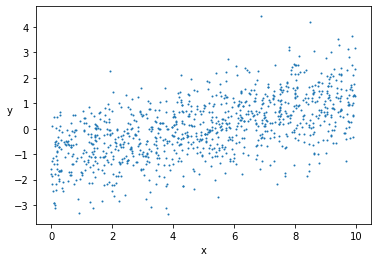

In [10]:
plt.scatter(X, y, s=1)
plt.ylabel('y', rotation=0)
plt.xlabel('x')

### Fitting a Linear Regression model

Instantiating the Linear Regression model object and fitting the data:

In [11]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
model

LinearRegression()

Display the model's intercept and slope (coef_) values:

In [12]:
print(model.intercept_)
print(model.coef_)

-1.1612566002825888
[0.24002588]


The values are close to the slope and intercept of the synthetic data, but because of the random noise they are just approximations.

Let's predict the values against the same data used to train the model:

In [13]:
y_pred = model.predict(X.reshape(-1, 1))

Visualizing the results:

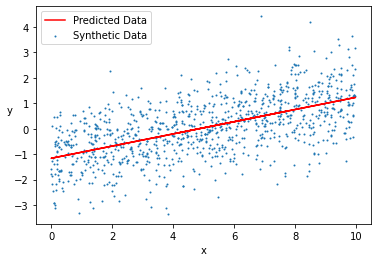

In [16]:
plt.scatter(X, y, s=1, label='Synthetic Data')
plt.plot(X, y_pred, c='r', label='Predicted Data')
plt.ylabel('y', rotation=0)
plt.xlabel('x')
plt.legend()